# 고객 

In [22]:
import pandas as pd
demo = pd.read_csv('고객DEMO.txt', sep = ",",engine='python', encoding = "cp949")
demo

,고객번호,성별,연령대,거주지역
0,1,M,60세이상,60.0
1,2,M,60세이상,100.0
2,3,M,60세이상,33.0
3,4,F,60세이상,16.0
4,5,M,60세이상,100.0
...,...,...,...,...
19378,19379,F,20세~24세,69.0
19379,19380,F,20세~24세,39.0
19380,19381,F,40세~44세,460.0
19381,19382,F,45세~49세,460.0


## null값 0으로 대체 

In [23]:
demo['거주지역'].fillna(0, inplace = True)

## int로 변환

In [24]:
demo['거주지역'] = demo['거주지역'].astype(int)

In [25]:
demo['거주지역'].unique()

array([ 60, 100,  33,  16, 240,  36,  10,  24,  43, 210, 460,  55,   0,
        47,  39, 440,  87,  65,  13,  49, 360,  69, 410, 340, 500,  72,
       610,  45,  75,  82,  30,  79,  27,  52, 270, 540, 310,  20, 570,
       300,  85, 630])

## 0(원래 null)값이 178개 

In [27]:
demo['거주지역'].value_counts()

100    5993
460    1922
55     1431
210    1071
500     860
16      819
610     639
60      603
540     568
340     346
360     339
24      339
270     338
49      329
410     321
570     294
47      278
310     234
13      220
440     217
10      185
0       178
240     177
75      175
27      146
36      139
39      119
65      114
43      109
72      109
33       96
87       95
69       94
52       88
20       76
82       68
30       66
45       54
79       48
85       41
300      32
630      13
Name: 거주지역, dtype: int64

## 거주지역 함수

In [28]:
def region(x):
    region =''
    
    if 10 <= x <=99:
        region = '서울'
    elif 100 <= x <= 209:
        region = '경기'
    elif 210 <= x <= 239:
        region = '인천'
    elif 240 <= x <= 269:
        region = '강원'
    elif 270 <= x <= 299:
        region = '충북'
    elif 300 <= x <= 309:
        region = '세종'
    elif 310 <= x <= 339:
        region = '충남'
    elif 340 <= x <= 359:
        region = '대전'
    elif 360 <= x <= 409:
        region = '경북'
    elif 410 <= x <= 439:
        region = '대구'
    elif 440 <= x <= 459:
        region = '울산'
    elif 460 <= x <= 499:
        region = '부산'
    elif 500 <= x <= 539:
        region = '경남'
    elif 540 <= x <= 569:
        region = '전북'    
    elif 570 <= x <= 609:
        region = '전남'
    elif 610 <= x <= 629:
        region = '광주'
    elif 630 <= x <= 639:
        region = '제주'
    else:
        region='없음'
    return region

## 함수 적용

In [29]:
demo['거주지역'] = demo['거주지역'].apply(lambda x: region(x))
demo

,고객번호,성별,연령대,거주지역
0,1,M,60세이상,서울
1,2,M,60세이상,경기
2,3,M,60세이상,서울
3,4,F,60세이상,서울
4,5,M,60세이상,경기
...,...,...,...,...
19378,19379,F,20세~24세,서울
19379,19380,F,20세~24세,서울
19380,19381,F,40세~44세,부산
19381,19382,F,45세~49세,부산


In [30]:
demo['거주지역'].unique()

array(['서울', '경기', '강원', '인천', '부산', '없음', '울산', '경북', '대구', '대전', '경남',
       '광주', '충북', '전북', '충남', '전남', '세종', '제주'], dtype=object)

In [34]:
demo_region = pd.DataFrame(demo.groupby('거주지역')['고객번호'].count())
demo_region

,고객번호
거주지역,
강원,177
경기,5993
경남,860
경북,339
광주,639
대구,321
대전,346
부산,1922
서울,5841


In [38]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [39]:
import warnings
warnings.filterwarnings('ignore')

## 고객 demo 거주지역 분포 

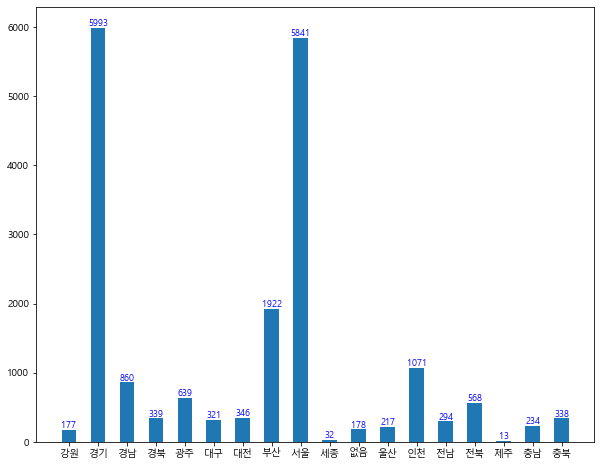

In [57]:
import matplotlib.pyplot as plt
x = demo_region.index
y = np.array(demo_region.values).reshape(-1)
plt.figure(figsize=(10,8))
plt.bar(x,y,width=0.5)

for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()

In [58]:
pdf2 = pd.pivot_table(demo,                # 피벗할 데이터프레임
                     index = '거주지역',    # 행 위치에 들어갈 열
                     columns = '연령대',    # 열 위치에 들어갈 열
                     values = '고객번호',     # 데이터로 사용할 열
                     aggfunc = 'count')   # 데이터 집계함수
pdf2

연령대,19세이하,20세~24세,25세~29세,30세~34세,35세~39세,40세~44세,45세~49세,50세~54세,55세~59세,60세이상
거주지역,,,,,,,,,,
강원,NaN,2.0,11.0,19.0,25.0,35.0,39.0,29.0,13.0,4.0
경기,6.0,87.0,199.0,513.0,865.0,1142.0,1311.0,985.0,537.0,348.0
경남,1.0,10.0,35.0,82.0,141.0,190.0,202.0,116.0,67.0,16.0
경북,NaN,5.0,3.0,33.0,45.0,68.0,94.0,56.0,26.0,9.0
광주,1.0,6.0,15.0,49.0,102.0,127.0,138.0,117.0,59.0,25.0
대구,NaN,3.0,19.0,37.0,59.0,59.0,56.0,49.0,19.0,20.0
대전,NaN,NaN,8.0,27.0,57.0,75.0,74.0,59.0,31.0,15.0
부산,1.0,35.0,66.0,191.0,314.0,383.0,386.0,269.0,162.0,115.0
서울,4.0,76.0,205.0,438.0,685.0,998.0,1215.0,965.0,637.0,618.0


In [61]:
pd.options.display.float_format = '{:.1f}'.format

Text(0.5, 1.0, '연령대-거주지역')

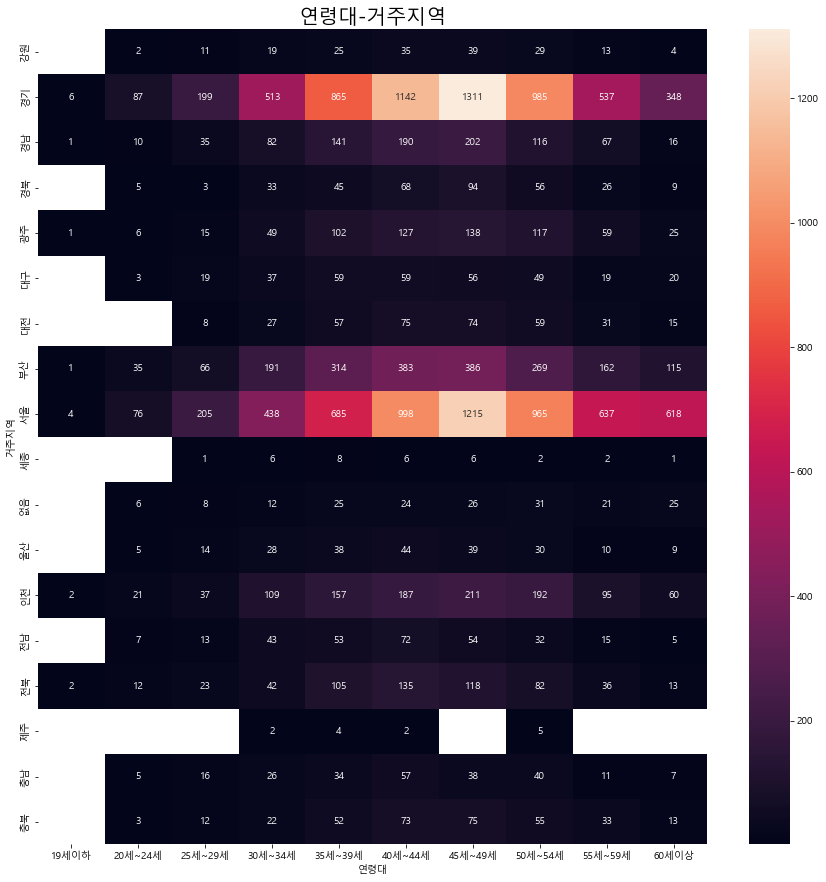

In [63]:
import seaborn as sns
fig = plt.figure()
fig.set_size_inches(15, 15)
sns.heatmap(pdf2, annot=True, fmt='g')
plt.title('연령대-거주지역', fontsize=20)

# null값때문에 구매상품TR 열어서 REGION함수 적용해야하는데 안열림..